In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os


In [2]:
train_datagen=ImageDataGenerator(rescale=1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)

In [3]:
train_data=train_datagen.flow_from_directory(
                        r'D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\cats_and_dogs_filtered\cats_and_dogs_filtered\train',
                        target_size=(300,300),
                        batch_size=10,
                        class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [4]:
validation_generator=test_datagen.flow_from_directory(
                        r'D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\cats_and_dogs_filtered\cats_and_dogs_filtered\validation',
                        target_size=(300,300),
                        batch_size=10,
                        class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [5]:
train_cats_dir=r"D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\cats_and_dogs_filtered\cats_and_dogs_filtered\train\cats"
train_dogs_dir=r"D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\cats_and_dogs_filtered\cats_and_dogs_filtered\train\dogs"

train_cats_names=os.listdir(train_cats_dir)
train_dogs_names=os.listdir(train_dogs_dir)

nrows=4
ncols=4
pic_index=0

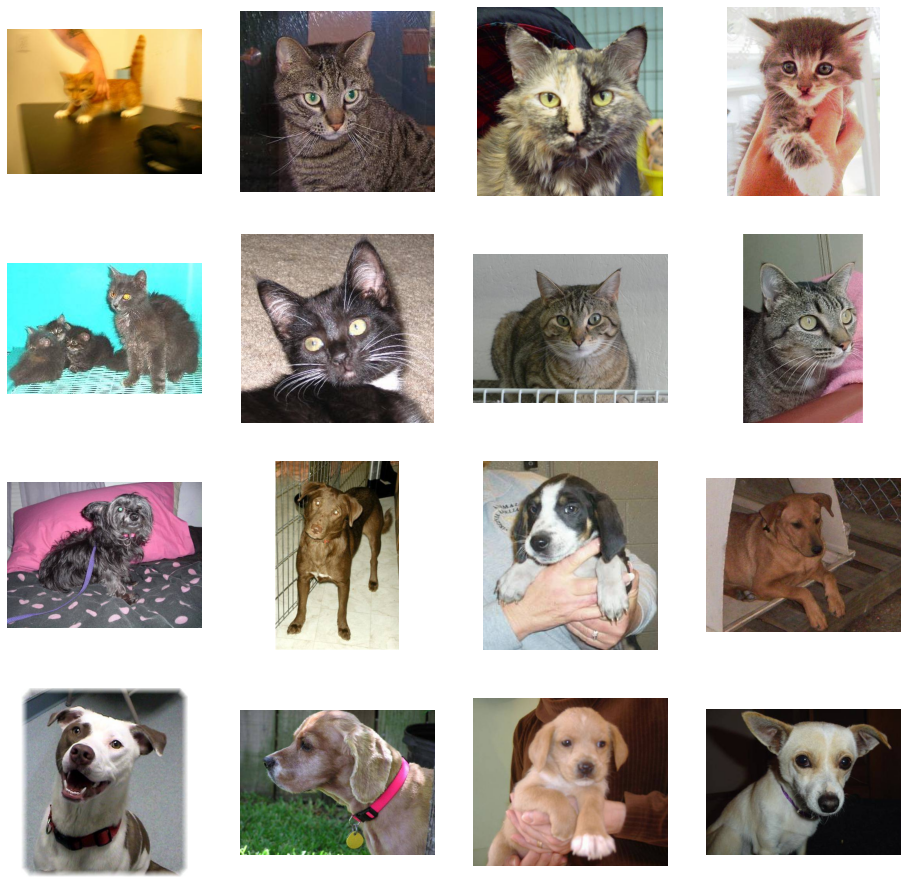

In [6]:
#visualising some of the images  (4*4)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8

next_cat_pic=[os.path.join(train_cats_dir, fname)
              for fname in train_cats_names[pic_index-8:pic_index]
             ]

next_dog_pic=[os.path.join(train_dogs_dir, fname)
              for fname in train_dogs_names[pic_index-8:pic_index]
             ]

for i,img_path in enumerate(next_cat_pic+next_dog_pic):
    #set up subplot, subplot indices starts at 1
    
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')  #doesnt show axes(or gridlines)
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show(
)

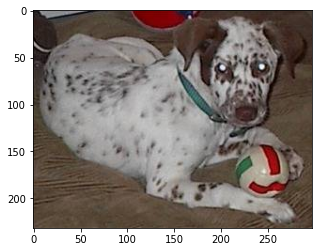

In [7]:
path=os.path.join(train_dogs_dir,train_dogs_names[41])
imag=mpimg.imread(path)
plt.imshow(imag)

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    
        def on_epoch_end(self,epoch,logs={}):
            if logs.get("accuracy") is not None and logs.get("accuracy") > 0.96:
                print("\nRequired accuracy achieved, thus stopping training loop")
                self.model.stop_training = True
                


In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [12]:
callbacks=myCallback()

In [13]:


training=model.fit(
    train_data,
    steps_per_epoch=train_data.samples//10,
    
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//10,
    callbacks=[callbacks],
    epochs=15

)

Epoch 1/15
200/200 [==============================] - 63s 311ms/step - loss: 0.7794 - accuracy: 0.5140 - val_loss: 0.6778 - val_accuracy: 0.6130
Epoch 2/15
200/200 [==============================] - 61s 303ms/step - loss: 0.6809 - accuracy: 0.6270 - val_loss: 0.6434 - val_accuracy: 0.6620
Epoch 3/15
200/200 [==============================] - 61s 306ms/step - loss: 0.5971 - accuracy: 0.6885 - val_loss: 0.5915 - val_accuracy: 0.6920
Epoch 4/15
200/200 [==============================] - 62s 308ms/step - loss: 0.5479 - accuracy: 0.7235 - val_loss: 0.5888 - val_accuracy: 0.6860
Epoch 5/15
200/200 [==============================] - 62s 308ms/step - loss: 0.4803 - accuracy: 0.7775 - val_loss: 0.5705 - val_accuracy: 0.7140
Epoch 6/15
200/200 [==============================] - 62s 311ms/step - loss: 0.4018 - accuracy: 0.8290 - val_loss: 0.7029 - val_accuracy: 0.7230
Epoch 7/15
200/200 [==============================] - 61s 307ms/step - loss: 0.3277 - accuracy: 0.8575 - val_loss: 0.9200 - val_ac

['1628396465_cat-people-1600x1200.webp', 'dog-puppy-on-garden-royalty-free-image-1586966191.jpg', 'gettyimages-135773550-bb02ff79dd836d6e4170d4bc555423f24fa29d5e-s1100-c50.jpg', 'p037rw6n.jpg']


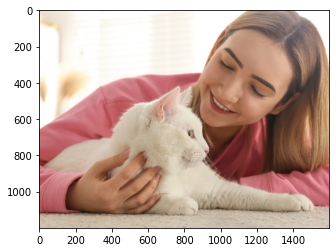


[0.31216073]
1628396465_cat-people-1600x1200.webp is a cat


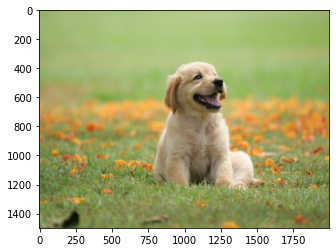


[0.999205]
dog-puppy-on-garden-royalty-free-image-1586966191.jpg is a dog


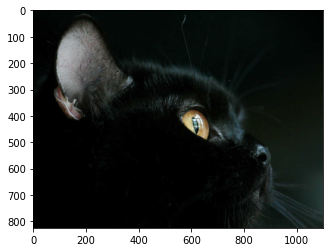


[0.00137129]
gettyimages-135773550-bb02ff79dd836d6e4170d4bc555423f24fa29d5e-s1100-c50.jpg is a cat


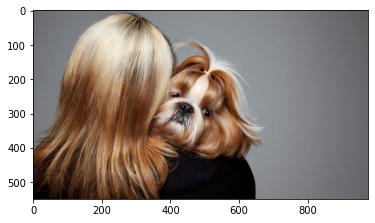


[0.7708336]
p037rw6n.jpg is a dog


In [14]:
#MODEL PREDICTION

import numpy as np
from keras.preprocessing import image
import os

test_path=r"D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\dog,cat images"
images = os.listdir(test_path)

print(images)

for i in images:
    display=os.path.join(test_path,i)
    imag=mpimg.imread(display)
    plt.imshow(imag)
    plt.show()
    
    print()
 # predicting images
    path = 'D:/AA-SANYUKTAA/Coursera-Tensorflow/datasets/dog,cat images/' + i
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a dog")
        
    else:
        print(i + " is a cat")
       

Text(0.5, 1.0, 'Training and validation loss')

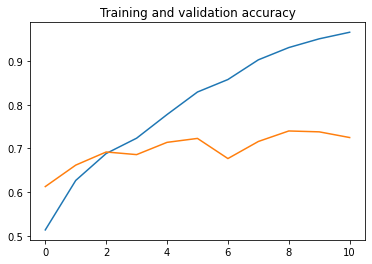

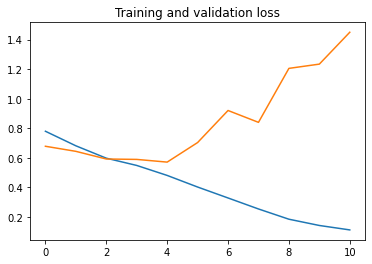

In [15]:
acc      = training.history[     'accuracy' ]
val_acc  = training.history[ 'val_accuracy' ]
loss     = training.history[    'loss' ]
val_loss = training.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [16]:
(acc_train,loss_train)=model.evaluate(train_data)

200/200 [==============================] - 14s 68ms/step - loss: 0.1218 - accuracy: 0.9460


In [18]:
(acc_train,loss_train)=model.evaluate(validation_generator)

100/100 [==============================] - 7s 67ms/step - loss: 1.4498 - accuracy: 0.7250
